In [2]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

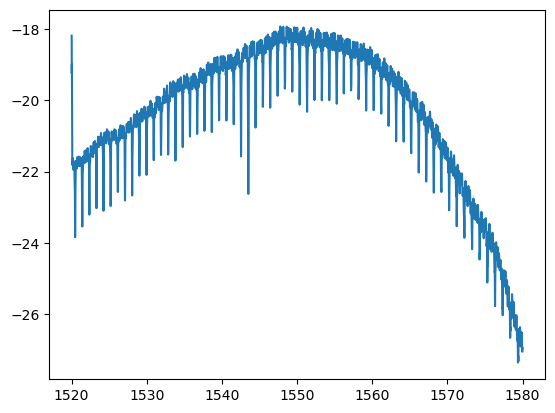

In [3]:
data_analyse_file="sg_rr_100_030 2023-12-08 16-08-32.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

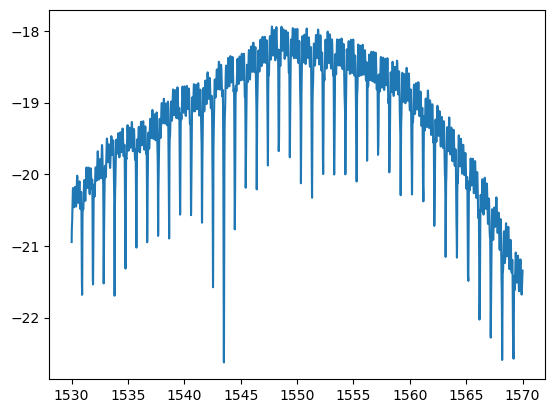

1530.0
1570.0


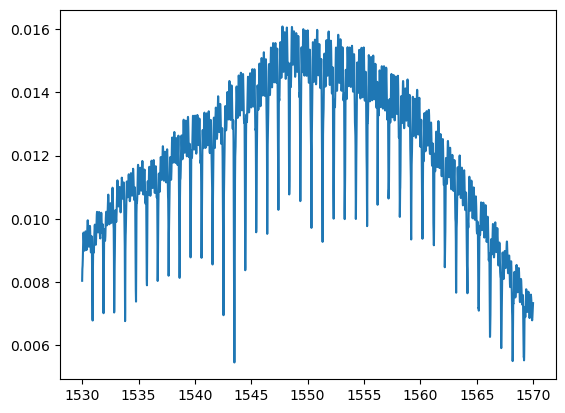

[0.00804356 0.0083018  0.00841434 ... 0.00720354 0.00729799 0.00733718]


In [8]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index] #selects wavelengths to search through
power_peak_search_dBm=pow_array[start_point_index:end_point_index] # selects powers to search though
power_peak_search=daf.vector_dBm_to_mW(power_peak_search_dBm) #converts powers to mW
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])
plt.plot(wvlen_peak_search,power_peak_search)
plt.show()
print(power_peak_search)

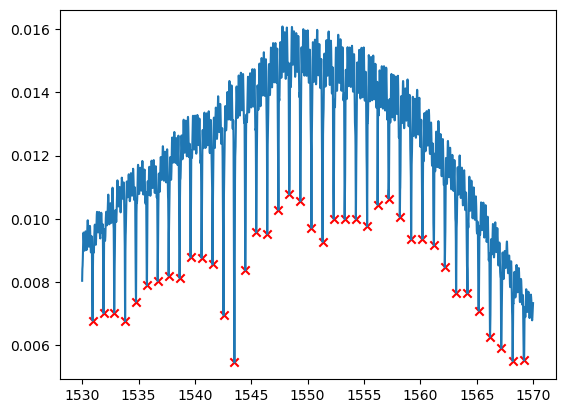

40
[1530.93, 1531.9, 1532.84, 1533.81, 1534.78, 1535.75, 1536.7, 1537.67, 1538.65, 1539.62, 1540.59, 1541.57, 1542.54, 1543.51, 1544.47, 1545.44, 1546.42, 1547.41, 1548.37, 1549.35, 1550.34, 1551.33, 1552.31, 1553.29, 1554.28, 1555.28, 1556.21, 1557.18, 1558.18, 1559.19, 1560.19, 1561.2, 1562.17, 1563.18, 1564.18, 1565.19, 1566.18, 1567.18, 1568.19, 1569.2]


In [10]:
wvlen_step_size=0.01
approx_fsr=1
promin_use=0.002
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for check
print(peak_wavelens)#check

In [11]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[0.97 0.94 0.97 0.97 0.97 0.95 0.97 0.98 0.97 0.97 0.98 0.97 0.97 0.96
 0.97 0.98 0.99 0.96 0.98 0.99 0.99 0.98 0.98 0.99 1.   0.93 0.97 1.
 1.01 1.   1.01 0.97 1.01 1.   1.01 0.99 1.   1.01 1.01]
0.9812820512820508
0.003163973295522586


Now to calculate peak widths below:

[0.07792817 0.07666117 0.0867951  0.06039012 0.08174887 0.08291881
 0.0789907  0.0890897  0.0756915  0.0879713  0.07971862 0.08588506
 0.08561211 0.08855277 0.09166749 0.0887889  0.07228575 0.08229898
 0.09146012 0.08888305 0.09999651 0.09597785 0.09541413 0.09155784
 0.11188023 0.09700397 0.04224581 0.09304864 0.09995507 0.07271687
 0.09122821 0.09757153 0.09820453 0.09909534 0.1034678  0.10312888
 0.09840453 0.09543868 0.08422385 0.10109537]


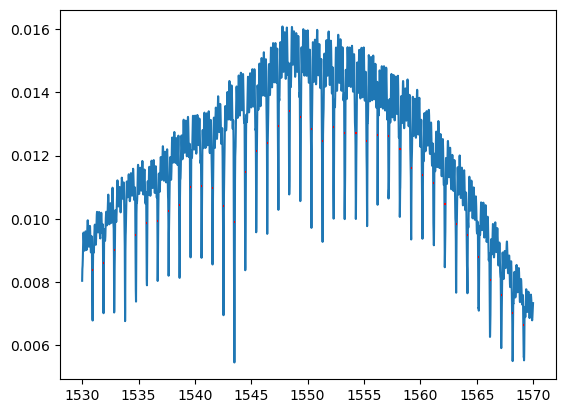

In [12]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [13]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)

0.08812484775923701
0.0020009495564127892


Now to to calculate Q factor, and its error, and Q^3/R^2, and its error.

In [14]:
Q_factor_list=peak_wavelens/peak_widths
mean_Q_factor,Q_factor_error=daf.fsr_avg_and_error(Q_factor_list)
print(mean_Q_factor)
print(Q_factor_error)


18076.149084442506
588.4192088744031


In [ ]:
radius=
radius_error=
Qcubed_over_Rsquared,Qcubed_over_Rsquared_error=daf.calc_Q3overR2(mean_Q_factor,Q_factor_error,radius,radius_error)
print(Qcubed_over_Rsquared)
print(Qcubed_over_Rsquared)